In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
!aws s3 ls

2024-01-04 04:34:17 bgp-ls-demo
2023-12-11 18:23:17 co-graph-drive-bucket-1
2023-06-05 05:14:00 deployed-ignatella-app-pets
2023-04-25 00:44:39 deployed-ignatella-tfstate
2024-03-18 12:13:11 ignatella-ray
2023-06-16 10:25:12 pt-ignatella-tfstate
2024-03-26 17:05:59 sagemaker-eu-north-1-422901541742
2024-03-26 14:51:06 sagemaker-studio-422901541742-45qvfhp8mmb
2024-03-26 14:39:14 sagemaker-studio-422901541742-dy8sadfa9t8
2024-03-26 17:05:57 sagemaker-studio-422901541742-ysuogi77x5e
2024-03-26 14:39:16 sagemaker-us-east-1-422901541742


In [3]:
import boto3

client = boto3.client('textract', region_name="eu-west-1")

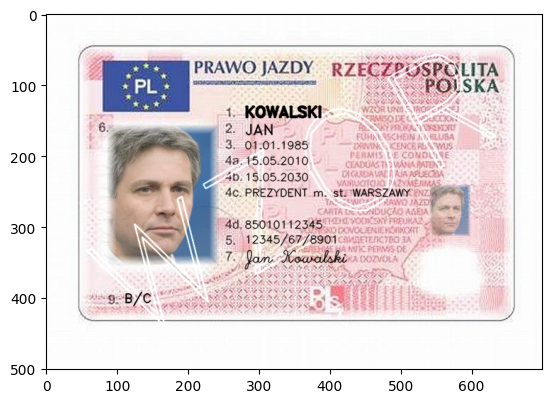

In [4]:
# with opecnv show ./driving-licence/person01.jpg

import cv2
import matplotlib.pyplot as plt

image_path = './driving-licence/person01.jpg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [5]:
with open(image_path, "rb") as document_file:
    document_bytes = document_file.read()

response = client.analyze_document(
    Document={"Bytes": document_bytes}, 
    FeatureTypes=['LAYOUT', 'QUERIES'], 
    QueriesConfig={
        'Queries': [
            {
                'Text': 'What is the document title?'
            },
            {
                'Text': 'What is written in section 1?'
            },
            {
                'Text': 'What is written in section 2?'
            },
            {
                'Text': 'What is written in section 3?'
            },
            {
                'Text': 'What is written in section 4d?'
            },
            {
                'Text': 'What is written in section 5?'
            },
            {
                'Text': 'What is written in section 9?'
            }
        ]
    },
)

In [6]:
queries = [block for block in response['Blocks'] if block['BlockType'].startswith('QUERY')]

questions = [query['Query']['Text'] for query in queries if query['BlockType'] == 'QUERY']
answers = [query['Text'] for query in queries if query['BlockType'] == 'QUERY_RESULT']

for question, answer in zip(questions, answers):
    print(f"{question}: {answer}")

What is the document title?: PRAWO JAZDY RZECZPOSPOLITA POLSKA
What is written in section 1?: KOWALSKI
What is written in section 2?: JAN
What is written in section 3?: 01.01.1985
What is written in section 4d?: 85010112345
What is written in section 5?: 12345/67/8901
What is written in section 9?: B/C


In [7]:
response

{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 0.9032453894615173,
     'Height': 0.830727756023407,
     'Left': 0.045215968042612076,
     'Top': 0.06411980092525482},
    'Polygon': [{'X': 0.045215968042612076, 'Y': 0.0681505873799324},
     {'X': 0.9465615153312683, 'Y': 0.06411980092525482},
     {'X': 0.9484613537788391, 'Y': 0.8883075714111328},
     {'X': 0.047920938581228256, 'Y': 0.894847571849823}]},
   'Id': 'e03fefa7-82ae-4286-aaaa-4f8e3251b5c3',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['e79f9ce6-aec2-4b2b-aa9a-7abdb7cdcdd6',
      'e0996d64-2082-4e42-9f90-83f677907a60',
      '2c0551a4-2580-467e-993f-c9312db38252',
      'e460d8b4-4f5d-4cd6-92d3-145db60d7281',
      '4792b714-ca22-4c61-a95a-9853bb9920c7',
      '8a0aef38-ff81-4c11-ab5f-f188c3c74431',
      '77dd5beb-b564-4d64-a9e8-2b2315165ed6',
      'c285da12-97b7-4908-979a-37328e7fe87e',
      'd869cbf5-8bfa-4f4b-98d3-afc2c36f5b65',
      '7f0f75

In [8]:
[b['Text'] for b in response['Blocks'] if b['BlockType'] == 'WORD']

['PRAWO',
 'JAZDY',
 'RZECZPOSPOLITA',
 'PL',
 'POLSKA',
 '1.',
 'KOWALSKI',
 '6.',
 '2.',
 'JAN',
 'FUHN',
 '3.',
 '01.01.1985',
 'DRIVIN',
 '4a.',
 '15.05.2010',
 'PERMIS',
 'LE',
 'CONDLINE',
 'CEADGAS',
 '1',
 'MANAPATENTA',
 '4b.',
 '15.05.2030',
 'GUIDA',
 'war',
 'I',
 'AJA-APLECBBA',
 'VAIRUOTOIO',
 'AZYMENMAS',
 '4c.',
 'PREZYDENT',
 'm.',
 'st.',
 'WARSZAWY',
 'CARTA',
 'AGEIA',
 '4d.',
 '85010112345',
 'THE',
 '5.',
 '12345/67/8901',
 '3A',
 'DE',
 '7.',
 'Jan',
 'Kowalski',
 'DOZVOLA',
 '9:',
 'B/C']